<a href="https://colab.research.google.com/github/harrwinrao/WOA7015/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruction
Read the following text and perform the following code. Every code is self-explainatory.

#Linear Regression

is an approach that tries to find a linear relationship between a dependent variable and an independent variable by minimizing the distance as shown below.

In this colab, we will learn how to implement a simple linear regression model using PyTorch.

Let’s consider a very basic linear equation i.e., y=2x+1. Here, ‘x’ is the independent variable and y is the dependent variable. We’ll use this equation to create a dummy dataset which will be used to train this linear regression model. Following is the code for creating the dataset.

In [2]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

Once we have created the dataset, we can start writing the code for our model. First thing will be to define the model architecture. We do that using the following piece of code.

In [3]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

We defined a class for linear regression, that inherits torch.nn.Module which is the basic Neural Network module containing all the required functions. Our Linear Regression model only contains one simple linear function.

Next, we instantiate the model using the following code.

In [ ]:
in_feature_size = 1       # takes variable 'x' - 1 features
out_feature_size= 1       # takes variable 'y'
learningRate = 0.01
epochs = 100

model = linearRegression(in_feature_size, out_feature_size)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

After that, we initialize the loss (Mean Squared Error) and optimization (Adam) functions that we’ll use in the training of this model.

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

After completing all the initializations, we can now begin to train our model. Following is the code for training the model.

In [ ]:
training_loss = []

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

    training_loss.append(loss.item())

Let's look at the loss curve

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(epochs), training_loss)
plt.xlabel('epoch')
plt.ylabel('training loss')

Now that our Linear Regression Model is trained, let’s test it. Since it’s a very trivial model, we’ll test this on our existing dataset and also plot to see the original vs the predicted outputs.

In [ ]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# to infer y when x = 7

x_infer = np.array([7], dtype=np.float32)
x_infer = x_infer.reshape(-1, 1)

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_infer).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_infer))).data.numpy()
    print('when x = 7, y = ', predicted)

when x = 7, y =  [[15.010226]]


In [ ]:
# print the weight

for param in model.parameters():
  print(param.data)

# Check
1. Are the weight obtained are m = 2, c = 1?
2. If no, this means that your model have not finish training, you can also check from the loss curve above, does the loss still going down?
3. If the error is still going now, try using larger epoch (train longer). Check the model.parameters.
4. You should be able to get the model parameters of [2, 1] when you use epoch = 1000.

Looks like our model has correctly figured out the linear relation between our dependent and independent variables.

If you have understood this, you should try and train a linear regression model for a little more complex linear equation with multiple independent variables.

#Reference

Credit to Asad Mahmood.
https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

# Now  is your turn.

Create a linear regression model using the following data.


Observe the loss value and compare the weight obtained with the true weight [0.052, 29.21]

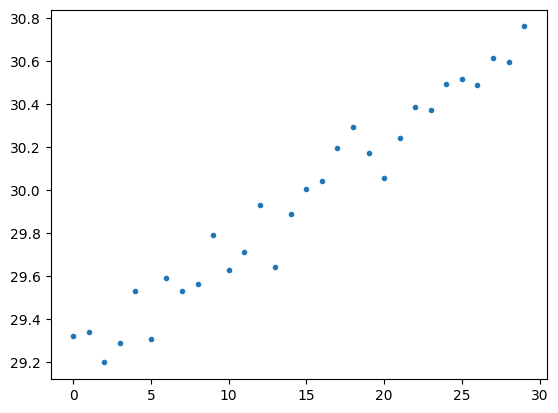

In [ ]:
x_values = [i for i in range(30)]
x = np.array(x_values, dtype=np.float32)
x = x.reshape(-1, 1)

y_values = [0.052*i + 29.21  for i in x_values] + np.random.normal(0,0.1,30)
y = np.array(y_values, dtype=np.float32)
y = y.reshape(-1, 1)

plt.plot(x, y, '.')

In [ ]:
# your code here

In [ ]:
#@title Solution
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)

        return out


inputDim = 1       # takes variable 'x' - 10 features
outputDim = 1       # takes variable 'y'
learningRate = 0.1
epochs = 1500

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()


criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)


training_loss = []

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x).cuda())
        labels = Variable(torch.from_numpy(y).cuda())
    else:
        inputs = Variable(torch.from_numpy(x))
        labels = Variable(torch.from_numpy(y))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

    training_loss.append(loss.item())




In [ ]:
#@title Default title text
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x))).data.numpy()

plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#@title Default title text
# print the weight
for param in model.parameters():
  print(param.data)

# Reference

1.   https://machinelearningmastery.com/building-a-logistic-regression-classifier-in-pytorch/
2.   https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/
3.   https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html


